Imagen Original:


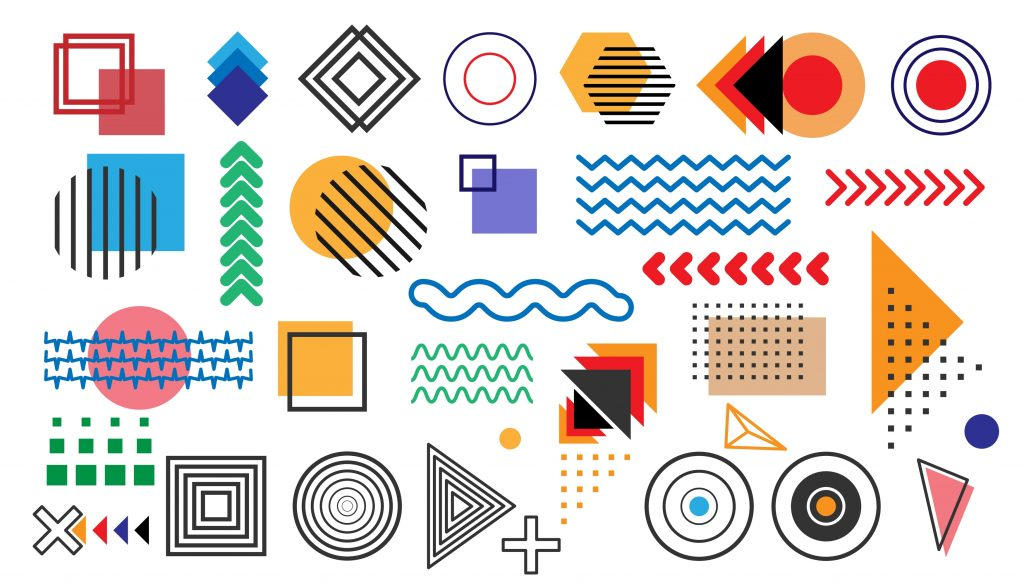


Imagen en Escala de Grises:


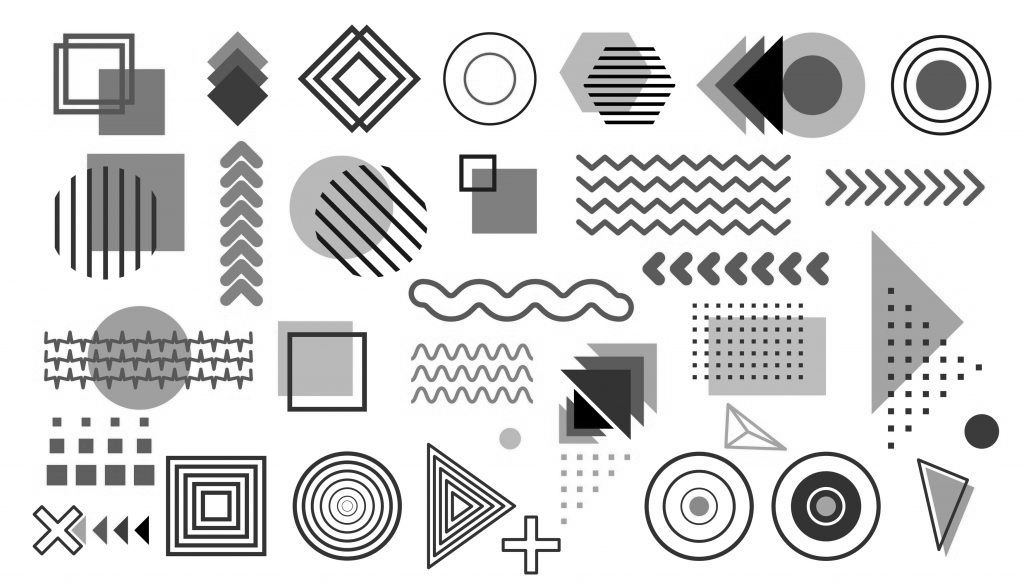

In [7]:
# Importar las bibliotecas necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # Específico para Google Colab



# Cargar la imagen en escala de grises
image = cv2.imread('formas.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Visualizar la imagen original y en escala de grises
print("Imagen Original:")
cv2_imshow(image)
print("\nImagen en Escala de Grises:")
cv2_imshow(gray_image)

Imagen con Umbral Fijo:


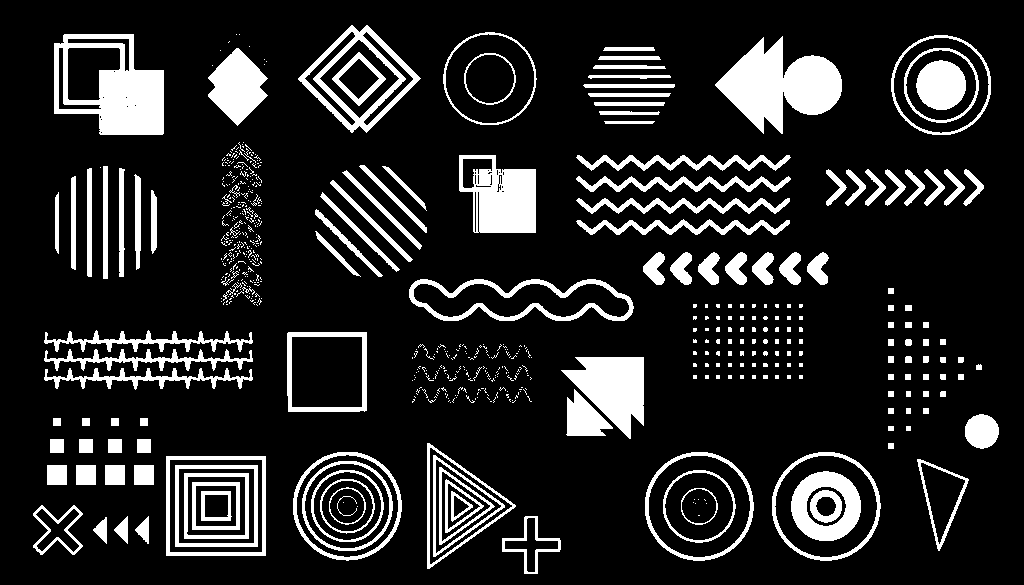

In [8]:
# Aplicar umbral fijo
# cv2.threshold(fuente, valor_umbral, valor_max, tipo_umbral)
# THRESH_BINARY_INV invierte los colores (objetos blancos sobre fondo negro)
ret, thresh_fixed = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)

print("Imagen con Umbral Fijo:")
cv2_imshow(thresh_fixed)

Imagen con Umbral Adaptativo:


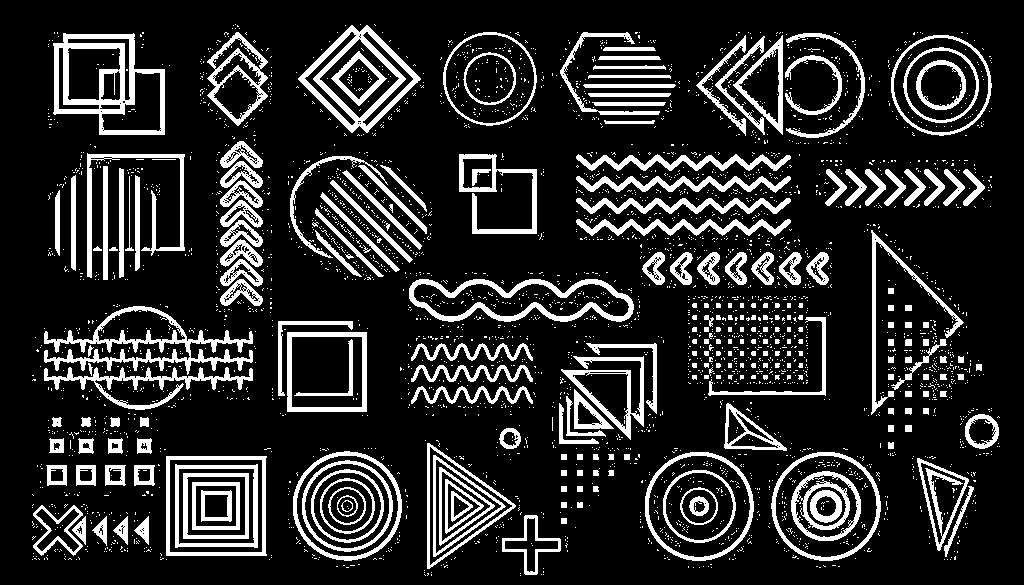

In [9]:
# Aplicar umbral adaptativo
# cv2.adaptiveThreshold(fuente, valor_max, método_adaptativo, tipo_umbral, tamaño_bloque, C)
# ADAPTIVE_THRESH_GAUSSIAN_C: el umbral es una suma ponderada gaussiana de los vecinos.
# C es una constante que se resta de la media.
thresh_adaptive = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                      cv2.THRESH_BINARY_INV, 11, 2)

print("Imagen con Umbral Adaptativo:")
cv2_imshow(thresh_adaptive)

Número total de formas detectadas: 607

Contornos dibujados sobre la imagen original:


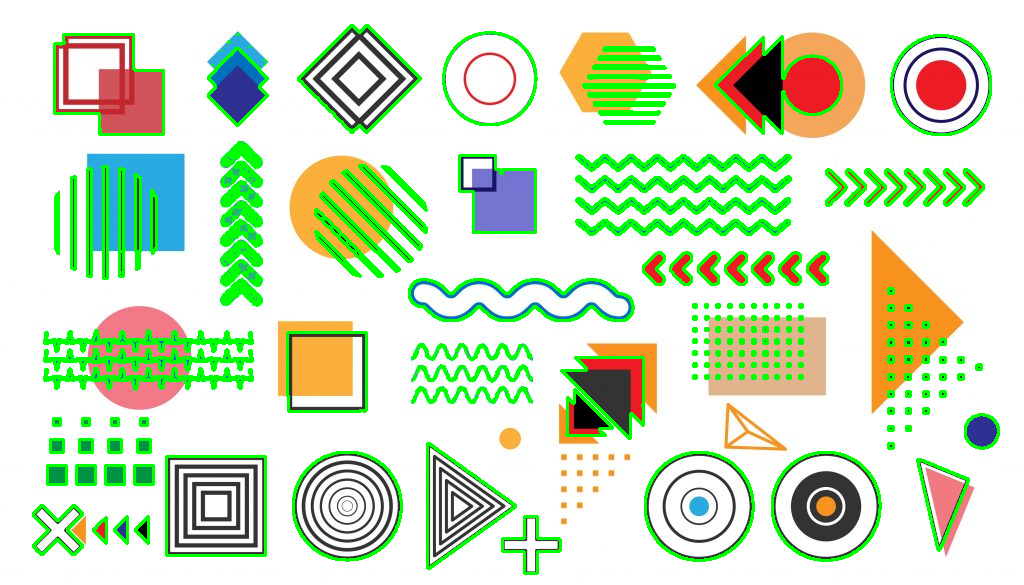

In [10]:
# Detectar contornos usando la imagen con umbral fijo
# cv2.findContours(imagen_binaria, modo_recuperación, método_aproximación)
# RETR_EXTERNAL: recupera solo los contornos externos.
# CHAIN_APPROX_SIMPLE: comprime segmentos horizontales, verticales y diagonales, dejando solo sus puntos finales.
contours, hierarchy = cv2.findContours(thresh_fixed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Crear una copia de la imagen original para dibujar sobre ella
contour_image = image.copy()

# Dibujar todos los contornos detectados
# cv2.drawContours(imagen_destino, contornos, índice_contorno (-1 para todos), color, grosor)
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

print(f"Número total de formas detectadas: {len(contours)}")
print("\nContornos dibujados sobre la imagen original:")
cv2_imshow(contour_image)

Análisis de Formas (Centroides en azul, Bounding Boxes en rojo):


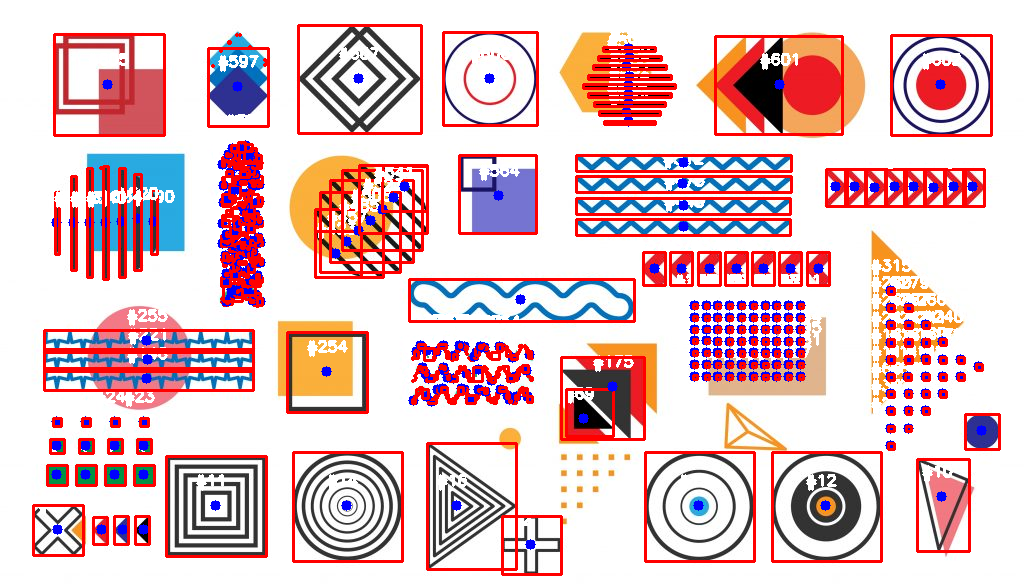


--- Métricas Básicas ---
📊 Número de formas detectadas: 607
📏 Área promedio: 222.00 píxeles^2
📐 Perímetro promedio: 35.69 píxeles


In [11]:
# Crear otra copia de la imagen para dibujar los nuevos elementos
analysis_image = image.copy()
total_area = 0
total_perimeter = 0

# Iterar sobre cada contorno detectado
for i, contour in enumerate(contours):
    # --- Calcular el Centro de Masa (Centroide) ---
    M = cv2.moments(contour)
    if M["m00"] != 0:
        # Coordenadas del centroide
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        # Dibujar un círculo en el centroide
        cv2.circle(analysis_image, (cx, cy), 5, (255, 0, 0), -1) # Círculo azul
        cv2.putText(analysis_image, f"#{i+1}", (cx - 20, cy - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # --- Calcular el Bounding Box ---
    x, y, w, h = cv2.boundingRect(contour)
    # Dibujar el rectángulo delimitador
    cv2.rectangle(analysis_image, (x, y), (x + w, y + h), (0, 0, 255), 2) # Rectángulo rojo

    # --- Calcular métricas ---
    total_area += cv2.contourArea(contour)
    total_perimeter += cv2.arcLength(contour, True)


# Calcular promedios
avg_area = total_area / len(contours)
avg_perimeter = total_perimeter / len(contours)

print("Análisis de Formas (Centroides en azul, Bounding Boxes en rojo):")
cv2_imshow(analysis_image)

# Mostrar las métricas calculadas
print("\n--- Métricas Básicas ---")
print(f"📊 Número de formas detectadas: {len(contours)}")
print(f"📏 Área promedio: {avg_area:.2f} píxeles^2")
print(f"📐 Perímetro promedio: {avg_perimeter:.2f} píxeles")